In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
def ignore_warn(*args,**kwargs):
    pass
warnings.warn=ignore_warn

from scipy import stats
from scipy.stats import norm,skew


In [2]:
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_id=train.Id
test_id=test.Id
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [5]:
train.shape,test.shape

((1460, 80), (1459, 79))

### data processing

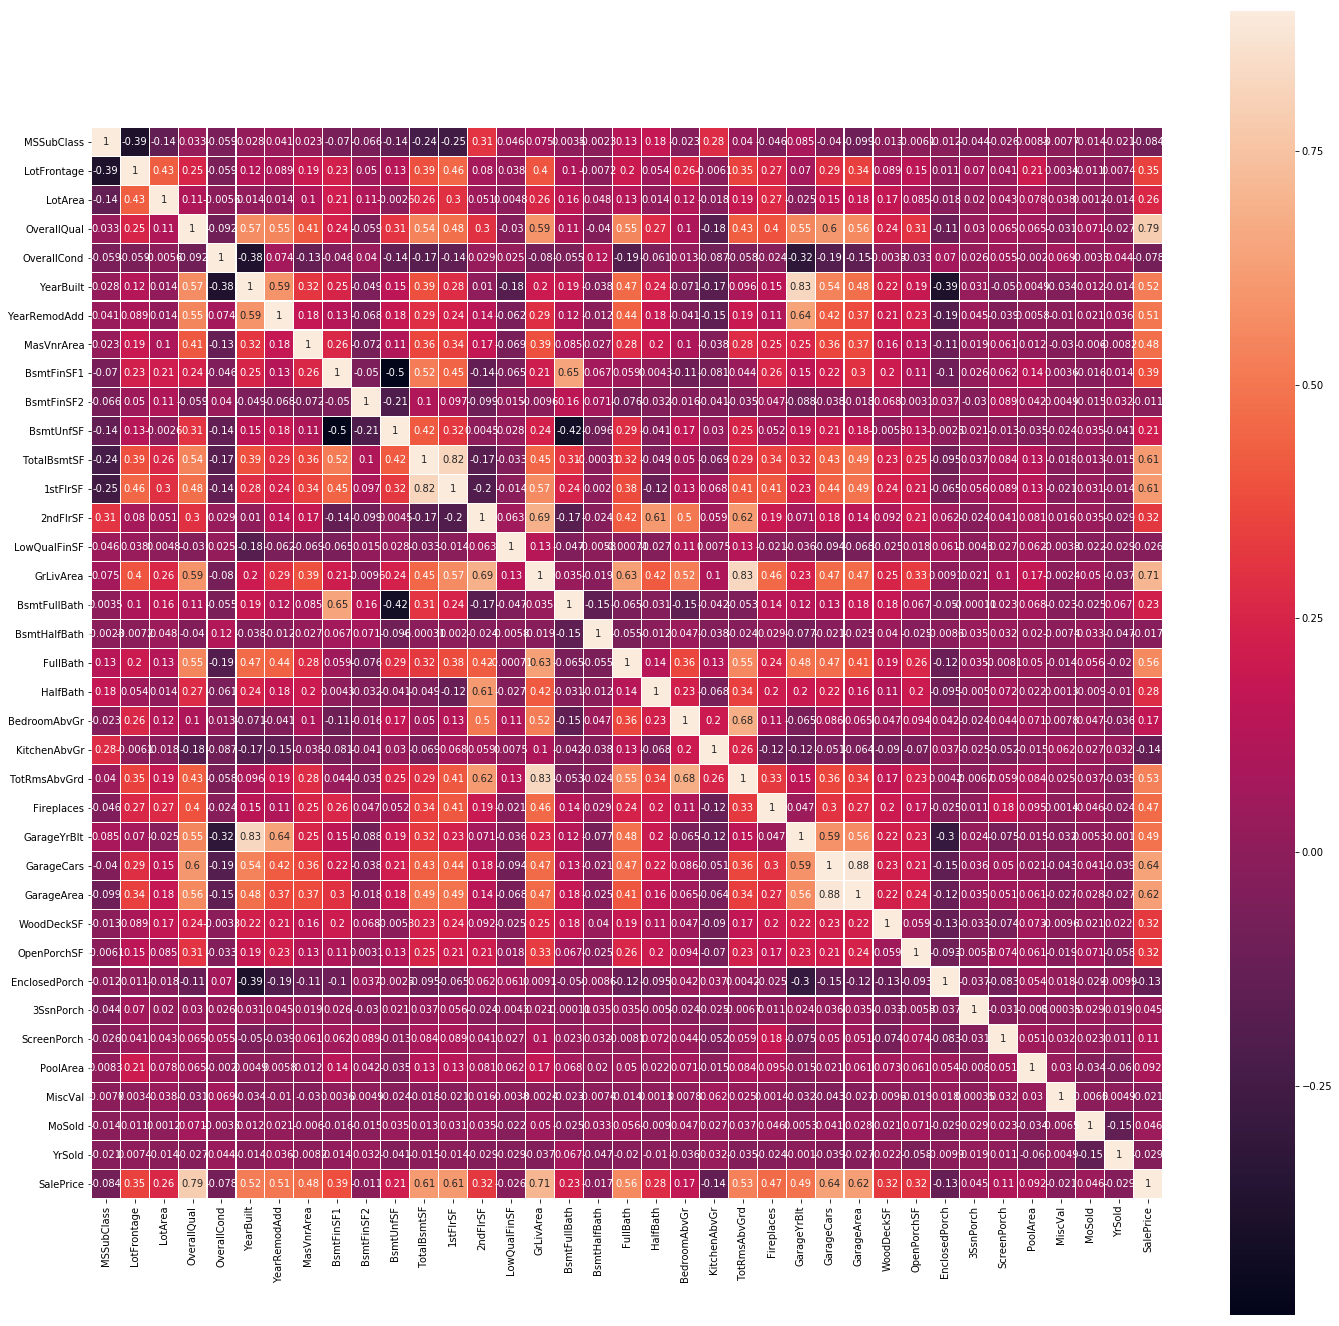

In [6]:
corrmat=train.corr()
plt.subplots(figsize=(24,24))
sns.heatmap(corrmat,vmax=0.9,square=True,linewidth=0.1,annot=True)

In [7]:
corrmat["SalePrice"].sort_values(ascending=True)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

### outliers

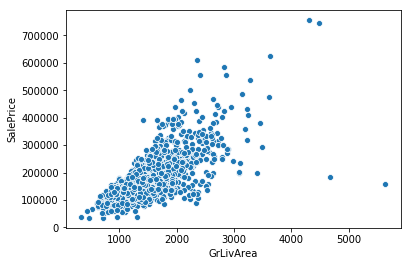

In [8]:
f,ax=plt.subplots()
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice)

In [9]:
train=train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)

### Target Variable

mu  180932.91906721535 sigma 79467.78892987774


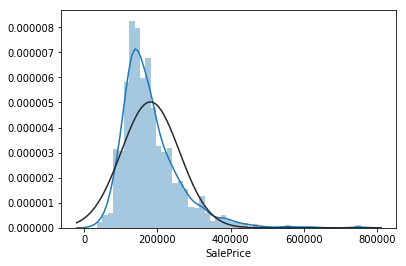

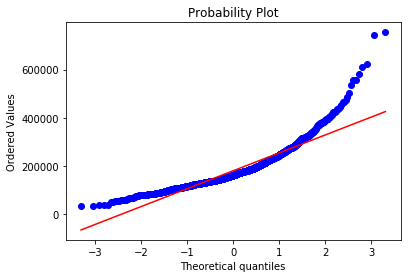

In [10]:
sns.distplot(train.SalePrice,fit=norm)
mu,sigma=norm.fit(train.SalePrice)
print("mu ",mu,"sigma", sigma)
flg=plt.figure()
res=stats.probplot(train.SalePrice,plot=plt)

12.024015155682552 0.3995757283645756


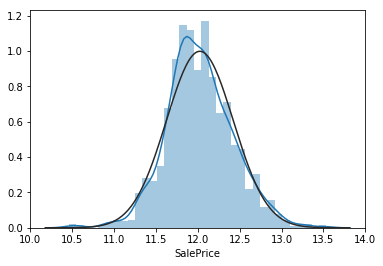

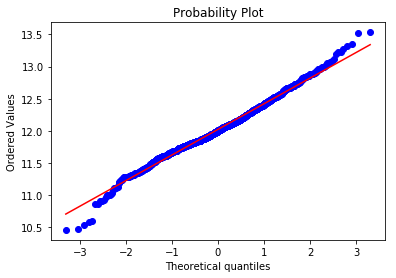

In [11]:
train.SalePrice=np.log1p(train.SalePrice)
sns.distplot(train.SalePrice,fit=norm)
mu,sigma=norm.fit(train.SalePrice)
print(mu,sigma)
f=plt.figure()
res=stats.probplot(train.SalePrice,plot=plt)

### feature engineering

In [12]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice
all_data=pd.concat((train,test),axis=0)
all_data.drop(["SalePrice"],axis=1,inplace=True)

### missing data

In [13]:
all_data_na=(all_data.isnull().sum()/all_data.shape[0])*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
missing_data=pd.DataFrame(all_data_na)
missing_data

,0
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [15]:
all_data.MSSubClass=all_data.MSSubClass.apply(str)
all_data.OverallCond=all_data.OverallCond.astype(str)

In [16]:
all_data.YrSold=all_data.YrSold.apply(str)
all_data.MoSold=all_data.MoSold.apply(str)

### label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
cols=('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    le=LabelEncoder()
    le.fit(list(all_data[c].values))
    all_data[c]=le.transform(list(all_data[c].values))

### getting dummy categorical features

In [19]:
all_data=pd.get_dummies(all_data)

In [20]:
train=all_data[:ntrain]
test=all_data[ntrain:]

In [27]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [22]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [24]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [25]:
max_depth_list=[]
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
model.fit(train,y_train)
rf_train_pre=model.predict(train)
rf_pre=np.expm1(model.predict(test))
print(rmsle(y_train, rf_train_pre))

0.051932359846455396


In [29]:
sub=pd.DataFrame()
sub['Id']=test_id
sub["SalePrice"]=rf_pre

from datetime import datetime
now = datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_rf_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [ ]:
1437
jinsoo5381
jinsoo5381novice tier
0.12164
3
now
Your Best Entry 
Your submission scored 0.14561, which is not an improvement of your best score. Keep trying!